<IPython.core.display.Javascript object>

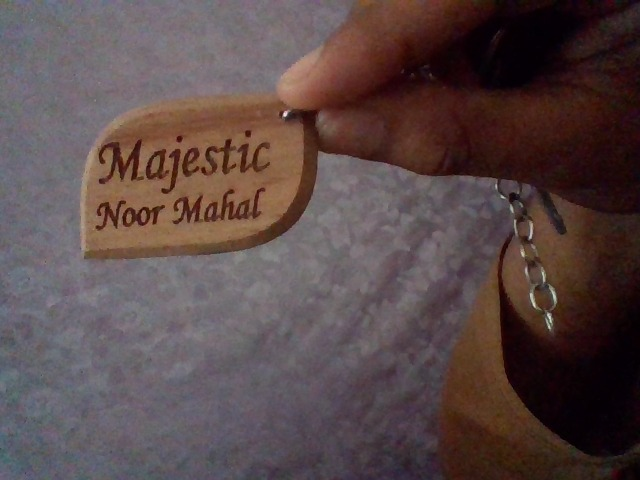

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def capture_webcam():
    display(Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());

            const dataURL = canvas.toDataURL('image/jpeg');
            return dataURL;
        }
        google.colab.kernel.invokeFunction('notebook.getWebcam', [], {})
    '''))
    data = eval_js("captureImage()")
    binary = b64decode(data.split(',')[1])
    np_array = np.frombuffer(binary, dtype=np.uint8)
    return cv2.imdecode(np_array, cv2.IMREAD_COLOR)

# Test Webcam Capture
image = capture_webcam()
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def capture_webcam():
    display(Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());

            const dataURL = canvas.toDataURL('image/jpeg');
            return dataURL;
        }

        // Now actually call and return it
        (async () => {
            const dataURL = await captureImage();
            google.colab.kernel.invokeFunction('notebook.returnImage', [dataURL], {});
        })();
    '''))

    # Receive image data from JS function
    from google.colab import output

    image_data = None

    def get_image(data_url):
        nonlocal image_data
        image_data = data_url

    output.register_callback('notebook.returnImage', get_image)

    # Wait for user interaction
    import time
    while image_data is None:
        time.sleep(1)

    binary = b64decode(image_data.split(',')[1])
    np_array = np.frombuffer(binary, dtype=np.uint8)
    return cv2.imdecode(np_array, cv2.IMREAD_COLOR)

# Test Webcam Capture
image = capture_webcam()
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def capture_webcam():
    display(Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;

            // Loop to monitor frames for motion
            while (true) {
                canvas.getContext('2d').drawImage(video, 0, 0);
                const frame1 = canvas.toDataURL('image/jpeg');

                // Wait for the next frame
                await new Promise(resolve => setTimeout(resolve, 100));

                canvas.getContext('2d').drawImage(video, 0, 0);
                const frame2 = canvas.toDataURL('image/jpeg');

                if (frame1 !== frame2) {
                    // Stop the stream and return the captured frame
                    stream.getTracks().forEach(track => track.stop());
                    return frame2;
                }
            }
        }
        google.colab.kernel.invokeFunction('notebook.getWebcam', [], {})
    '''))
    data = eval_js("captureImage()")
    binary = b64decode(data.split(',')[1])
    np_array = np.frombuffer(binary, dtype=np.uint8)
    return cv2.imdecode(np_array, cv2.IMREAD_COLOR)

# Test Webcam Capture with Motion Detection
image = capture_webcam()
if image is not None:
    print("Motion detected! Capturing image...")
    cv2_imshow(image)
else:
    print("No motion detected.")
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def capture_webcam():
    display(Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());

            const dataURL = canvas.toDataURL('image/jpeg');
            return dataURL;
        }

        // Now actually call and return it
        (async () => {
            const dataURL = await captureImage();
            google.colab.kernel.invokeFunction('notebook.returnImage', [dataURL], {});
        })();
    '''))

    # Receive image data from JS function
    from google.colab import output

    image_data = None

    def get_image(data_url):
        nonlocal image_data
        image_data = data_url

    output.register_callback('notebook.returnImage', get_image)

    # Wait for user interaction
    import time
    while image_data is None:
        time.sleep(1)

    binary = b64decode(image_data.split(',')[1])
    np_array = np.frombuffer(binary, dtype=np.uint8)
    return cv2.imdecode(np_array, cv2.IMREAD_COLOR)

# Test Webcam Capture
image = capture_webcam()
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def take_photo():
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg');
        }
        takePhoto();
    ''')

    display(js)
    data = eval_js("takePhoto()")  # This will get the base64 image string
    binary = b64decode(data.split(',')[1])
    image = np.frombuffer(binary, dtype=np.uint8)
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

# Capture and display
img = take_photo()
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
